Here I look at some of the data generated from Solinst Levelogger Pressure transducers, which will be installed in the wells and stream gauges at Sagehorn. 

Import required libraries:

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import HTML
import numpy as np
import scipy as sp
%matplotlib inline

A little function that converts kPa to height of water column in cm:

In [86]:
def kPa_to_cm(kPa):
    cm = kPa * 10.2
    return cm

Read in the temperature time-series data, look at the first few rows. The column headers are sensor serial numbers

In [87]:
temp = pd.read_csv('temp.csv',sep=',',  parse_dates=[[0,1]])
temp.head()

,Date_Time,2050012,2044813,2051151,2052038,2052047,2052309,2052487,2052495,2052511,Actual Water Level (cm)
0,2015-11-21 10:30:00,24.000,24.700,24.524,23.5,23.8,24.533,23.7,23.7,23.6,NaN
1,2015-11-21 10:35:00,23.633,24.192,24.173,23.8,24.0,23.982,23.5,23.6,23.7,NaN
2,2015-11-21 10:40:00,24.250,24.346,24.482,23.9,24.0,24.312,23.9,24.0,24.0,NaN
3,2015-11-21 10:45:00,24.453,24.504,24.628,24.2,24.2,24.492,24.1,24.2,24.2,NaN
4,2015-11-21 10:50:00,23.636,23.659,23.734,23.5,23.6,23.683,23.5,23.5,23.6,NaN


Plot the full time series of each sensor. It sat in the window in 273 McCone over the weekend and experienced >10 deg c temperature fluctuations!

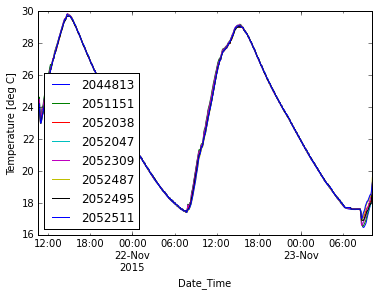

In [88]:
tempPlot = temp.plot("Date_Time",range(1,9,1))
tempPlot.set_ylabel("Temperature [deg C]")

Now, let's read in the pressure data and look at it as well. The pressure transducers are unvented and record absolute pressure in kPa (water weight + atmospheric pressure)

In [89]:
pressure = pd.read_csv('pressure.csv',sep=',',  parse_dates=[[0,1]])
pressure.head()


,Date_Time,2050012,2044813,2051151,2052038,2052047,2052309,2052487,2052495,2052511
0,2015-11-21 10:30:00,100.643,100.828,100.740,100.718,100.699,100.664,100.650,100.705,100.688
1,2015-11-21 10:35:00,100.629,100.826,100.726,100.711,100.659,100.646,100.619,100.705,100.690
2,2015-11-21 10:40:00,101.679,101.910,101.887,101.770,101.718,101.731,101.696,101.735,101.769
3,2015-11-21 10:45:00,101.729,101.895,101.842,101.771,101.720,101.783,101.685,101.693,101.767
4,2015-11-21 10:50:00,102.601,102.837,102.792,102.661,102.611,102.652,102.571,102.629,102.676


The pressure jumps up when I drop them in water, then decreases steadily, due to a combination of both evaporation (the water column dropped about 1.4 cm over the weekend) and also atmospheric pressure variations. The sensors were dangling at slightly different depths from string (+/- 1 cm from eachother), so shouldn't all plot right on top of eachother like the temperature data

(103.5, 104.5)

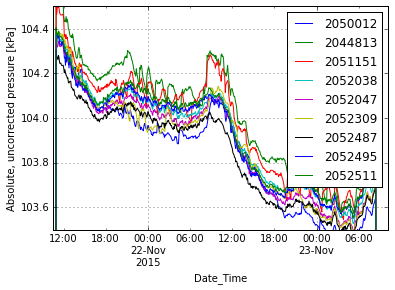

In [90]:
fig = plt.figure()
pressurePlot = pressure.plot("Date_Time",range(0,9,1))
pressurePlot.set_ylabel("Absolute, uncorrected pressure [kPa]")
plt.grid(True)
pressurePlot.set_ylim([103.5,104.5])

I can't figure out how to explain the finer scale wiggles in the time-series data. Sampling interval = 5 mins. The window was open in 273, and I don't think the heater was coming on because the temperature profiles are so smooth.

Let's look at the very start of the time series, when I added specific amounts of water:

10:37 am: added sensors to water

10:46 am: added 9.8 cm water

10:51 am: added 17.9 cm water

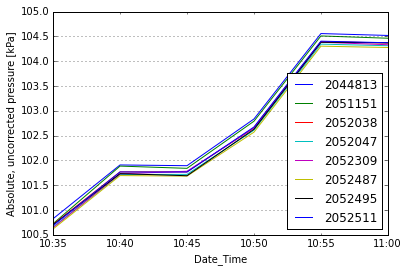

In [94]:

startDateTime = pd.to_datetime('2015-11-21 10:30:00')
stopDateTime = pd.to_datetime('2015-11-21 11:05:00')
pressure = pressure[ (pd.to_datetime(pressure["Date_Time"]) > startDateTime) & (pd.to_datetime(pressure["Date_Time"]) < stopDateTime)]


pressurePlot2 = pressure.plot("Date_Time",range(1,9,1))
pressurePlot2.set_ylabel("Absolute, uncorrected pressure [kPa]")
plt.grid(True)
